<a href="https://colab.research.google.com/github/vitormenandro/quarentenaDados/blob/master/QuarentenaDados_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/vitormenandro/quarentenaDados/master/ml-latest-small/movies.csv")
filmes.columns = ['filmeId','titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


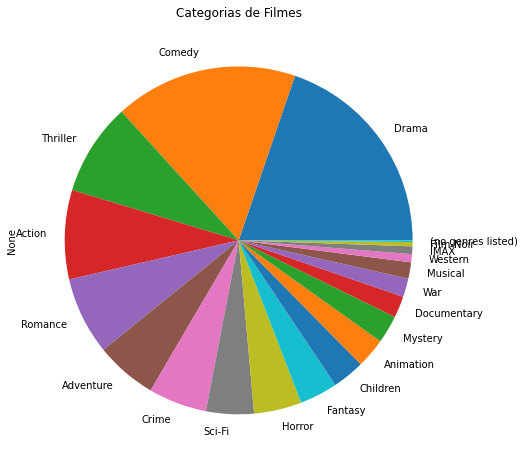

In [0]:
import matplotlib.pyplot as plt
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de Filmes',
    figsize=(8,8))
plt.show()

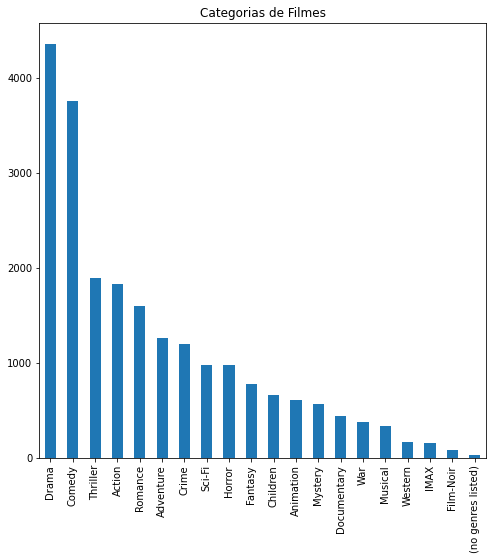

In [0]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Categorias de Filmes',
    figsize=(8,8))
plt.show()

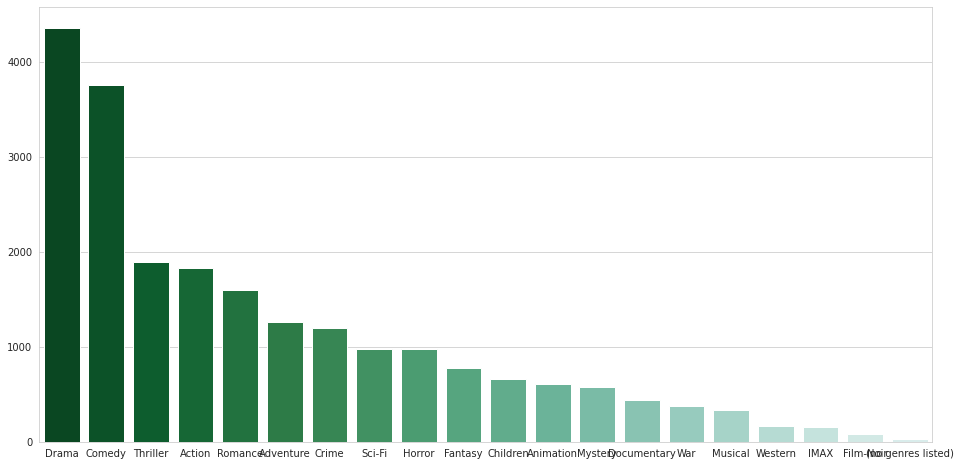

In [0]:
import seaborn as sns

filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero) + 4)) 
plt.show()

3.9209302325581397


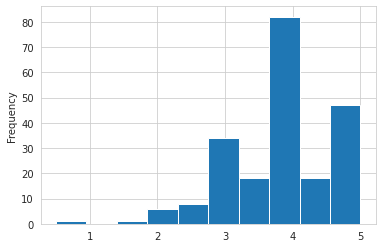

In [0]:
avaliacoes = pd.read_csv("https://github.com/vitormenandro/quarentenaDados/blob/master/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ['usuarioId','filmeId','nota', 'momento']
notas_do_filme_1 = avaliacoes.query("filmeId == 1")['nota']
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


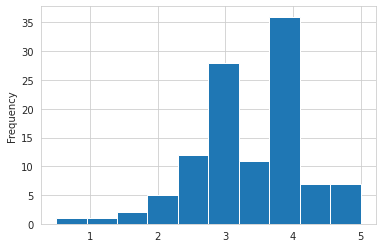

In [0]:
notas_do_filme_2 = avaliacoes.query("filmeId == 2")['nota']
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')

In [0]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [0]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
avaliacoes.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [0]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.sort_values('nota', ascending=False)[2450:2500]

,filmeId,titulo,genero,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId == {n}")['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

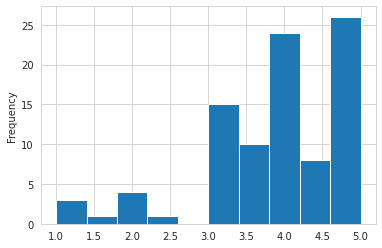

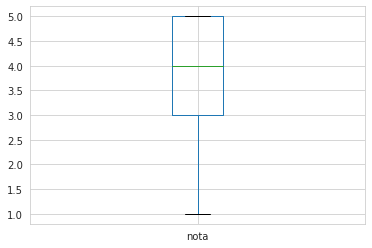

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(919)

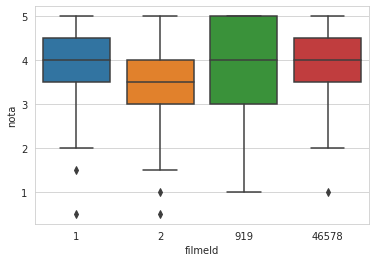

In [0]:
sns.boxplot(data = avaliacoes.query('filmeId in [1,2,919,46578]'), x = 'filmeId', y = 'nota')